# Analyzing Pizza Sales Data

This notebook analyzes a dataset containing pizza sales information.

## 1. Importing Libraries and Loading Data

We begin by importing necessary libraries, including `pandas` for data manipulation and `matplotlib.pyplot` for plotting. We then load the four CSV files (`orders.csv`, `order_details.csv`, `pizzas.csv`, and `pizza_types.csv`) into pandas DataFrames.

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
orders = pd.read_csv("C:/Users/Hp/Downloads/orders.csv")

In [ ]:
order_detail = pd.read_csv("C:/Users/Hp/Desktop/My Datasets/Copy of Pizza+Place+Sales/pizza_sales/order_details.csv")

In [ ]:
pizza = pd.read_csv("C:/Users/Hp/Desktop/My Datasets/Copy of Pizza+Place+Sales/pizza_sales/pizzas.csv")

In [ ]:
pizza_types = pd.read_csv("C:/Users/Hp/Desktop/My Datasets/Copy of Pizza+Place+Sales/pizza_sales/pizza_types.csv", encoding= "latin1")

## 2. Data Inspection

I displayed the first few rows of each DataFrame to get a glimpse of the data structure and content.

In [ ]:
order_detail.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [ ]:
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## 3. Merging DataFrames

To perform comprehensive analysis, I merged the DataFrames based on common columns. This process combines the information from different files into a single DataFrame called `full_data`.

In [ ]:
price= pd.merge(order_detail, pizza, on= "pizza_id")

In [ ]:
full_data= pd.merge(price, orders, on= "order_id")

In [ ]:
full_data= pd.merge(full_data, pizza_types, on= "pizza_type_id")

In [ ]:
full_data["data"] = pd.to_datetime(full_data["date"])

In [ ]:
full_data["time"] = pd.to_datetime(full_data["time"], format = "%H:%M:%S").dt.time

## 4. Data Cleaning and Transformation

I converted the 'date' column to datetime objects and extract the time from the 'time' column. I then displayed the first few rows of the merged and transformed DataFrame.

In [ ]:
full_data.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients,data
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01


## 5. Key Performance Indicators (KPIs) Calculation

 Calculate several key metrics to understand the overall sales performance.

In [ ]:
total_revenue = full_data["price"].sum()

In [ ]:
total_revenue

801944.7000000001

In [ ]:
total_quantity_sold = full_data["quantity"].sum()

In [ ]:
total_quantity_sold

49574

In [ ]:
total_orders = full_data.shape[0]

In [ ]:
total_orders

48620

In [ ]:
pizza_types = full_data["pizza_type_id"].nunique()

In [ ]:
pizza_types

32

In [ ]:
pizza_average_price = full_data["price"].mean()

In [ ]:
pizza_average_price

16.494132044426163

In [ ]:
peak_hours_of_sales = full_data["time"].value_counts().idxmax()

In [ ]:
peak_hours_of_sales

datetime.time(12, 32)

## 6. Daily Sales Analysis

Group the data by date and calculate the total sales for each day, then sort in descending order.

In [ ]:
daily_total_sales = full_data.groupby("date")["price"].sum().sort_values(ascending = False)

In [ ]:
daily_total_sales

date
2015-11-27    4342.70
2015-11-26    4315.95
2015-10-15    4257.45
2015-07-04    3852.20
2015-07-03    3340.50
               ...   
2015-12-27    1389.05
2015-11-22    1336.45
2015-12-29    1312.50
2015-03-22    1244.00
2015-12-30    1201.65
Name: price, Length: 358, dtype: float64

## 7. Best and Worst Performing Pizzas

Identify the top 5 best-selling pizza types based on the count of orders. I also identified the bottom 5 worst-selling pizza types based on total revenue.

In [ ]:
best_5_pizzas = full_data["pizza_type_id"].value_counts().head(5)

In [ ]:
best_5_pizzas

pizza_type_id
classic_dlx    2416
bbq_ckn        2372
hawaiian       2370
pepperoni      2369
thai_ckn       2315
Name: count, dtype: int64

## 8. Monthly Sales Analysis

Extract the month from the date and calculate the total sales for each month. Finally,visualize the monthly sales using a bar plot.

In [ ]:
full_data["date"] = pd.to_datetime(full_data["date"])

In [ ]:
full_data["month"] = full_data["date"].dt.month

In [ ]:
sales_in_each_month = full_data.groupby("month")["price"].sum()

In [ ]:
sales_in_each_month

month
1     68472.70
2     64067.40
3     69198.00
4     67286.20
5     69939.35
6     66796.30
7     71027.45
8     67068.80
9     63018.00
10    62566.50
11    69054.00
12    63450.00
Name: price, dtype: float64

<Axes: xlabel='month'>

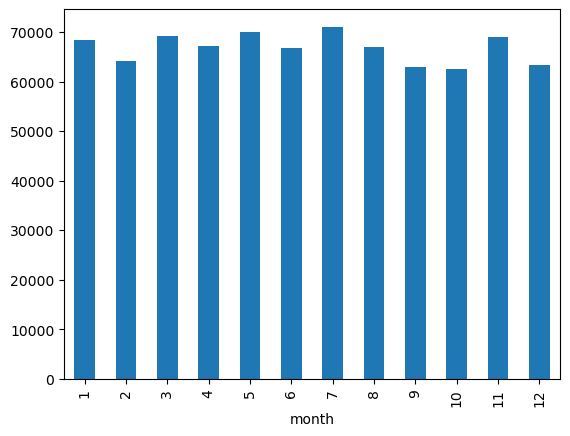

In [ ]:
sales_in_each_month.plot(kind = "bar")

In [ ]:
plt.show()

In [ ]:
bad_pizza = full_data.groupby("pizza_type_id")["price"].sum().sort_values(ascending=True).head(5)

In [ ]:
bad_pizza

pizza_type_id
brie_carre      11352.00
green_garden    13819.50
spinach_supr    15124.00
mediterraneo    15163.00
spin_pesto      15388.25
Name: price, dtype: float64